In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_income = pd.read_csv("/content/sample_data/canada_per_capita_income.csv")
df_income.sample(10)

,year,per capita income (US$)
26,1996,16699.826680
45,2015,35175.188980
29,1999,17581.024140
7,1977,7100.126170
18,1988,15080.283450
24,1994,15755.820270
9,1979,7602.912681
23,1993,15875.586730
36,2006,32738.262900
40,2010,38420.522890


In [5]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 880.0 bytes


In [4]:
df_income.describe()

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


<ipython-input-6-74836fe47642>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_income['per capita income (US$)'])


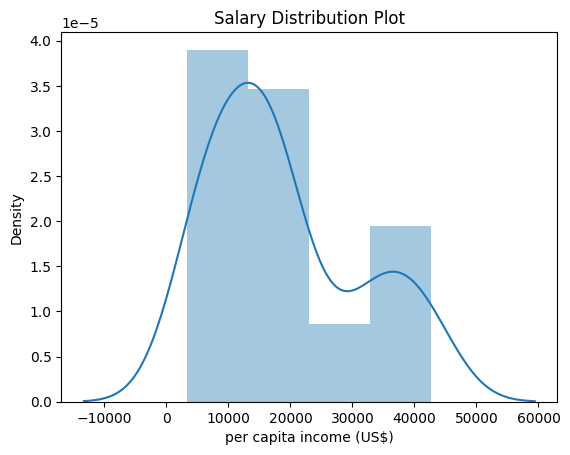

In [6]:
# Data distribution
plt.title('Salary Distribution Plot')
sns.distplot(df_income['per capita income (US$)'])
plt.show()

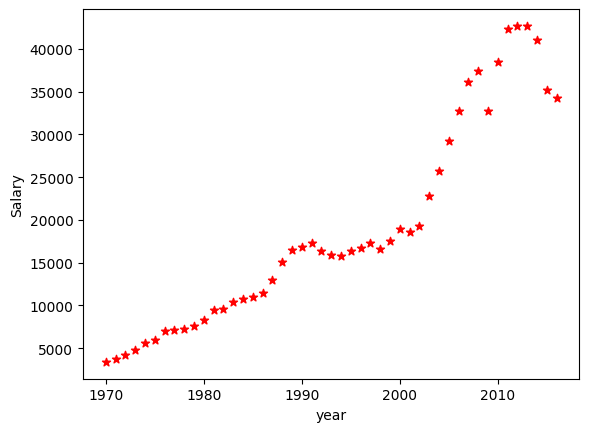

In [7]:
plt.xlabel('year')
plt.ylabel('Salary')
plt.scatter(df_income['year'],df_income['per capita income (US$)'],color='red',marker='*')

In [9]:
new_df_income = df_income.drop('per capita income (US$)',axis='columns')
new_df_income.head(5)

,year
0,1970
1,1971
2,1972
3,1973
4,1974


In [11]:
income_salary = df_income['per capita income (US$)']
income_salary.sample(10)

10     8355.968120
45    35175.188980
9      7602.912681
7      7100.126170
31    18601.397240
32    19232.175560
28    16622.671870
20    16838.673200
43    42676.468370
42    42665.255970
Name: per capita income (US$), dtype: float64

In [12]:
# Import Linear regression Model
from sklearn import linear_model

In [13]:
# Create linear regression object
lr = linear_model.LinearRegression()
lr.fit(new_df_income,income_salary)

LinearRegression()

In [15]:
# (1) Predict price of a home with area = 3300 sqr ft
lr.predict([[2010]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([33004.04334219])

In [16]:
lr.coef_

array([828.46507522])

In [17]:
lr.intercept_

-1632210.7578554575

In [19]:
df_years = pd.read_csv('/content/sample_data/years.csv')
df_years.sample(2)

,year
20,2015
0,1978


In [20]:
p = lr.predict(df_years)
p

array([ 6493.16093506,  7321.62601029,  8150.09108551,  8978.55616073,
        9807.02123595, 18091.67198818, 18920.1370634 , 19748.60213863,
       20577.06721385, 21405.53228907, 22233.9973643 , 23062.46243952,
       23890.92751474, 24719.39258996, 25547.85766519, 26376.32274041,
       33832.50841741, 34660.97349264, 35489.43856786, 36317.90364308,
       37146.3687183 , 37974.83379353, 38803.29886875, 39631.76394397,
       40460.22901919, 41288.69409442, 42117.15916964])

In [21]:
df_years["Income Salary Predictions"] = p
df_years

,year,Income Salary Predictions
0,1978,6493.160935
1,1979,7321.626010
2,1980,8150.091086
3,1981,8978.556161
4,1982,9807.021236
5,1992,18091.671988
6,1993,18920.137063
7,1994,19748.602139
8,1995,20577.067214
9,1996,21405.532289


In [22]:
# Export Data from DataFrame to Csv
df_years.to_csv('prediction.csv', index=False)
